In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [11]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/kc_house_data.csv')

In [12]:
#Check if there is null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
#Drop duplicate numbers if the dataset has.
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
#Drop 'id' column since it is unnecessary to predict
df = df.drop(['id'], axis = 1)
#Convert 'time' column type
df['date'] = pd.to_datetime(df['date'])

In [29]:
#Calculate correlations to identify which variables need to be use to predict the price of house
correlations = df.corr()['price'].abs().sort_values(ascending=False)
#Find the features those correlations are higher than 0.5
top_features = correlations[correlations > 0.5].index.tolist()

print(top_features)

['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']


In [30]:
results = ols("price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5160.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:48:42   Log-Likelihood:            -2.9911e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.469e+05   1.35e+04    -47.870

In [31]:
"y_hat = -0.00006469 + 245.4280sqft_living + 0.00005111grade - 80.4847sqft_above + 22.8201sqft_living15 - 0.0003546bathrooms"

'y_hat = -0.00006469 + 245.4280sqft_living + 0.00005111grade - 80.4847sqft_above + 22.8201sqft_living15 - 0.0003546bathrooms'

In [32]:
#Predict results of price with these main features
pred_vals = results.predict(df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']])

In [34]:
pred_vals

0        320050.240441
1        545162.349954
2        172893.231989
3        451469.840738
4        488576.450771
             ...      
21608    439942.593109
21609    575438.810662
21610    295224.033751
21611    448749.711721
21612    295224.033751
Length: 21613, dtype: float64

In [35]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [36]:
res

,y_hat,price
0,320050.240441,221900.0
1,545162.349954,538000.0
2,172893.231989,180000.0
3,451469.840738,604000.0
4,488576.450771,510000.0
...,...,...
21608,439942.593109,360000.0
21609,575438.810662,400000.0
21610,295224.033751,402101.0
21611,448749.711721,400000.0


In [37]:
res['error'] = res['y_hat'] - res['price']

In [38]:
res.head(1)

,y_hat,price,error
0,320050.240441,221900.0,98150.240441


In [39]:
res['sq_error'] = res['error']**2

In [40]:
np.sqrt(res['sq_error'].mean())

247847.32161370697

(array([3.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00, 1.9000e+01,
        5.6000e+01, 2.2000e+02, 3.5710e+03, 1.7515e+04, 2.2300e+02]),
 array([-4829773.64080206, -4244192.45357489, -3658611.26634773,
        -3073030.07912057, -2487448.89189341, -1901867.70466625,
        -1316286.51743909,  -730705.33021193,  -145124.14298477,
          440457.04424239,  1026038.23146956]),
 <BarContainer object of 10 artists>)

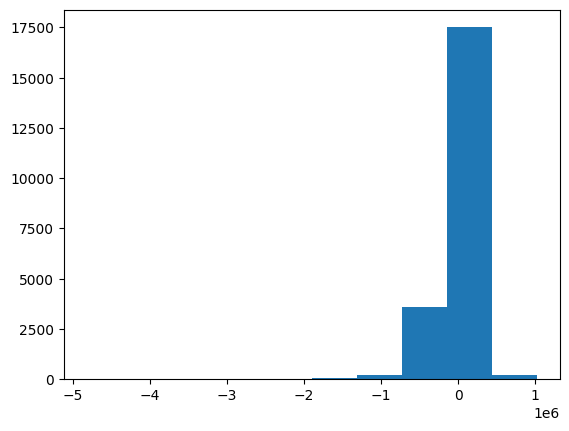

In [41]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

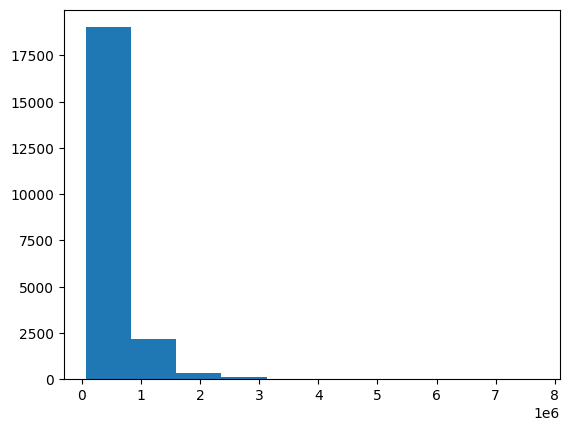

In [42]:
plt.hist(df['price'])

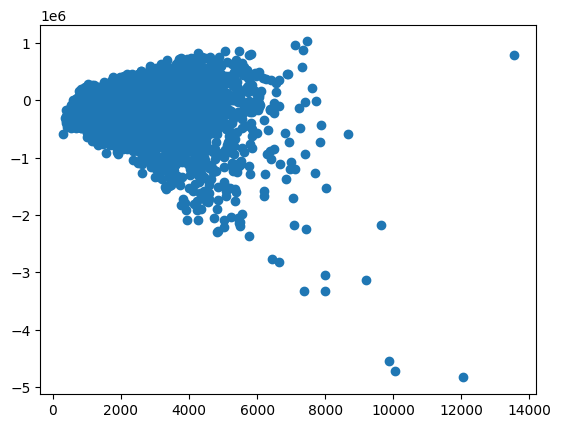

In [43]:
plt.scatter(df['sqft_living'],res['error'])

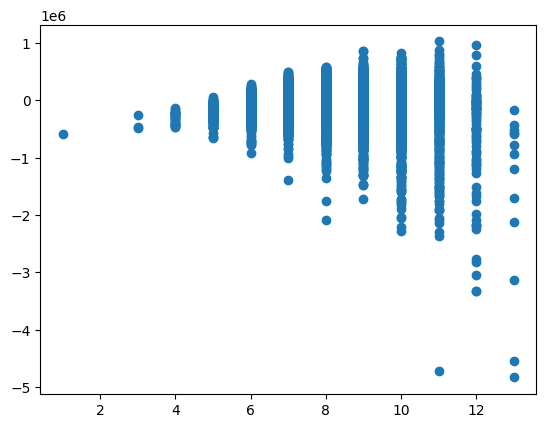

In [48]:
plt.scatter(df['grade'],res['error'])

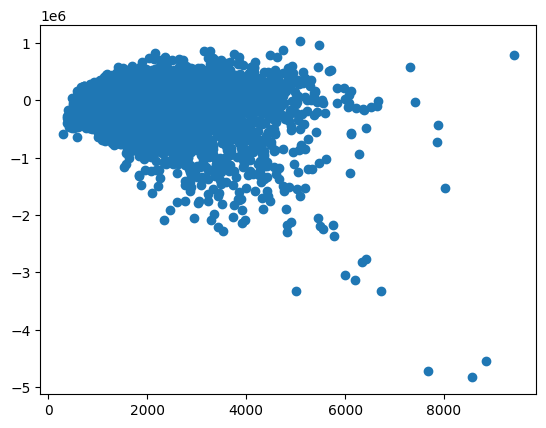

In [45]:
plt.scatter(df['sqft_above'],res['error'])

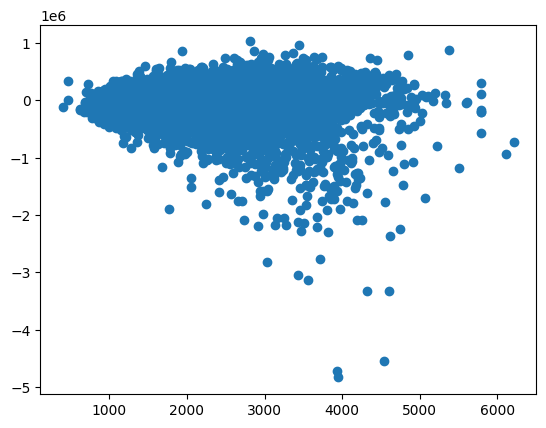

In [46]:
plt.scatter(df['sqft_living15'],res['error'])

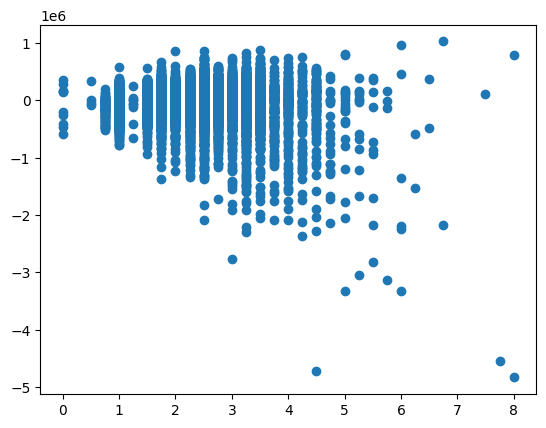

In [47]:
plt.scatter(df['bathrooms'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4829773.64080206, -4712092.0802764 , -4545665.09640674, ...,
           884599.18232901,   957492.46361652,  1026038.23146956])),
 (223647.63823408002, -3.3738755317823206e-08, 0.9021998973485872))

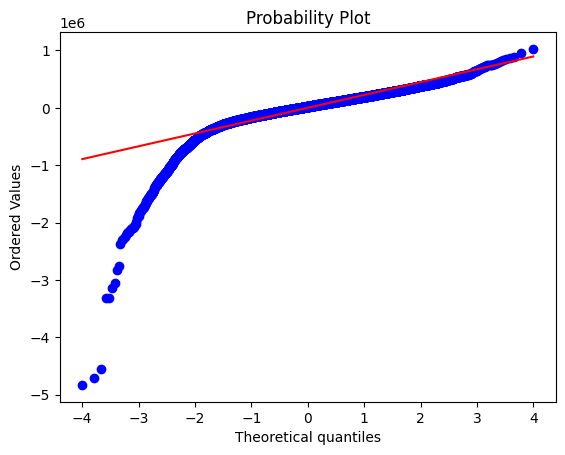

In [49]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [50]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_grade  dfb_sqft_above   
0          -0.000422         0.000199  -0.001605       -0.000757  \
1          -0.000277        -0.000184   0.000233       -0.000108   
2           0.000233        -0.000252  -0.000284       -0.000063   
3           0.001858         0.002678  -0.001888       -0.005844   
4          -0.000351        -0.000442   0.000509        0.000174   
...              ...              ...        ...             ...   
21608       0.001722         0.002497  -0.002125       -0.000427   
21609      -0.000283         0.002094  -0.000351       -0.004545   
21610      -0.000123         0.000436   0.003127        0.000675   
21611       0.000970         0.001308  -0.001324       -0.000418   
21612      -0.000034         0.000121   0.000871        0.000188   

       dfb_sqft_living15  dfb_bathrooms       cooks_d  standard_resid   
0               0.001493       0.003264  4.541306e-06       -0.395990  \
1               0.000180       0.0000

In [51]:
infl.summary_frame()

,dfb_Intercept,dfb_sqft_living,dfb_grade,dfb_sqft_above,dfb_sqft_living15,dfb_bathrooms,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000422,0.000199,-0.001605,-0.000757,0.001493,0.003264,4.541306e-06,-0.395990,0.000174,-0.005220,-0.395983,-0.005220
1,-0.000277,-0.000184,0.000233,-0.000108,0.000180,0.000023,2.921446e-08,-0.028897,0.000210,-0.000419,-0.028897,-0.000419
2,0.000233,-0.000252,-0.000284,-0.000063,0.000707,-0.000034,1.058110e-07,0.028681,0.000771,0.000797,0.028680,0.000797
3,0.001858,0.002678,-0.001888,-0.005844,-0.002946,0.008624,2.544309e-05,0.615458,0.000403,0.012356,0.615450,0.012355
4,-0.000351,-0.000442,0.000509,0.000174,-0.000159,0.000026,1.305817e-07,0.086431,0.000105,0.000885,0.086429,0.000885
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.001722,0.002497,-0.002125,-0.000427,0.001457,-0.002577,3.750762e-06,-0.322538,0.000216,-0.004744,-0.322531,-0.004744
21609,-0.000283,0.002094,-0.000351,-0.004545,0.003959,-0.001771,1.029396e-05,-0.707796,0.000123,-0.007859,-0.707788,-0.007859
21610,-0.000123,0.000436,0.003127,0.000675,-0.003464,-0.004708,8.983759e-06,0.431224,0.000290,0.007342,0.431215,0.007342
21611,0.000970,0.001308,-0.001324,-0.000418,0.001377,-0.001436,1.448994e-06,-0.196687,0.000225,-0.002949,-0.196683,-0.002948


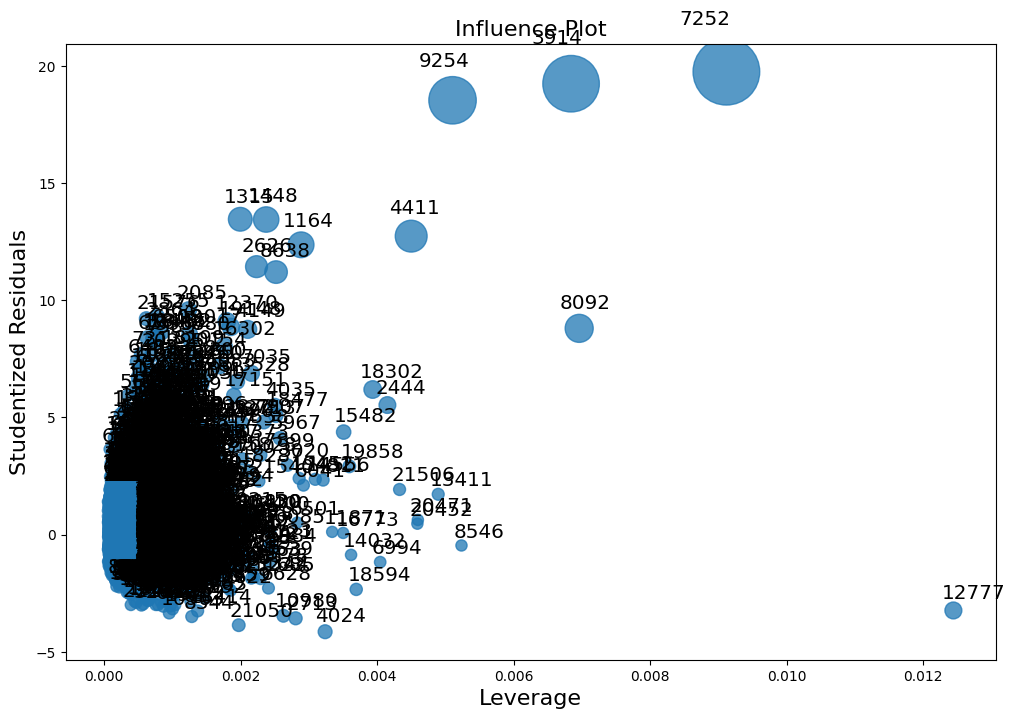

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [63]:
main_features = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df[main_features]
                                                    ,df['price'],
                                                    test_size = 0.3, random_state=1234)

In [65]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [66]:
# building processor
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, main_features)])

In [67]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [68]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', Lasso())])

In [69]:
lasso_pred = lasso_regression.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

232451.72311374248

In [71]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [72]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [73]:
pred_ridge = ridge_regression.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

232446.9774803663

In [75]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [76]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'sqft_above',
                                                   'sqft_living15',
                                                   'bathrooms'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [77]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

236216.36994061564